This project is part of my learning journey of deep learning through the STEAM Center Artificial Intelligence Diploma

https://steamcenter.co/programs.html

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 135 kB 7.2 MB/s 
     |████████████████████████████████| 1.6 MB 72.4 MB/s 


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/STEAM/Data/breastcancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
print(data['diagnosis'].unique())
print ('benign (B) = 0')
print ('malignant (M) = 1')

['M' 'B']
benign (B) = 0
malignant (M) = 1


In [ ]:
data['diagnosis'].replace(['B','M'],[0,1], inplace=True)

In [ ]:
data.shape

(569, 33)

In [ ]:
data.dtypes

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
data = data.drop('Unnamed: 32', axis=1)

In [ ]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

scaled_df = pd.DataFrame(scaled, columns=data.columns)
scaled_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000915,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.000915,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.092495,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.092547,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.092559,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [ ]:
y = scaled_df["diagnosis"] 
X = scaled_df.drop('diagnosis', axis=1)
X_train , X_test , y_train , y_test = train_test_split(X, y,test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(426, 31) (143, 31) (426,) (143,)


In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Input(shape=[31]))
  for i in range(hp.Int('num_layers', 2, 8)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
  model.add(keras.layers.Dense(1,activation='sigmoid'))
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.binary_crossentropy,
                metrics=['accuracy'])

  return model

In [ ]:
tuner = kt.Hyperband(
    model_builder,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='project1',
    project_name='breast_cancer')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 8, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test), callbacks=[stop_early])


Trial 30 Complete [00h 00m 02s]
val_accuracy: 0.9580419659614563

Best val_accuracy So Far: 0.9860140085220337
Total elapsed time: 00h 00m 37s


In [ ]:
tuner.results_summary()

Results summary
Results in project1/breast_cancer
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 4
units_0: 480
units_1: 416
learning_rate: 0.01
units_2: 32
units_3: 352
units_4: 288
units_5: 64
units_6: 480
units_7: 512
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0014
Score: 0.9860140085220337
Trial summary
Hyperparameters:
num_layers: 8
units_0: 224
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 32
units_4: 480
units_5: 224
units_6: 224
units_7: 384
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0018
Score: 0.9790209531784058
Trial summary
Hyperparameters:
num_layers: 5
units_0: 128
units_1: 224
learning_rate: 0.01
units_2: 448
units_3: 192
units_4: 384
units_5: 288
units_6: 448
units_7: 96
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.9720279574394226
Trial summary
Hyperparameters:
num_layers: 5
units_0: 128
units_1: 224
learning_rate: 0.01

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model = tuner.hypermodel.build(best_hps)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

Early_stoping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)

history = model.fit(X_train, y_train, epochs=50, 
                        callbacks=[Early_stoping],
                        validation_data=(X_test,y_test))

Epoch 1/50
14/14 [==============================] - 1s 14ms/step - loss: 0.5701 - accuracy: 0.6362 - val_loss: 0.1870 - val_accuracy: 0.9441
Epoch 2/50
14/14 [==============================] - 0s 4ms/step - loss: 0.2852 - accuracy: 0.8709 - val_loss: 0.1410 - val_accuracy: 0.9371
Epoch 3/50
14/14 [==============================] - 0s 4ms/step - loss: 0.2085 - accuracy: 0.9085 - val_loss: 0.0912 - val_accuracy: 0.9790
Epoch 4/50
14/14 [==============================] - 0s 5ms/step - loss: 0.1108 - accuracy: 0.9507 - val_loss: 0.0668 - val_accuracy: 0.9720
Epoch 5/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0915 - accuracy: 0.9601 - val_loss: 0.1731 - val_accuracy: 0.9301
Epoch 6/50
14/14 [==============================] - 0s 4ms/step - loss: 0.0981 - accuracy: 0.9671 - val_loss: 0.2460 - val_accuracy: 0.9301
Epoch 7/50
14/14 [==============================] - 0s 5ms/step - loss: 0.1080 - accuracy: 0.9648 - val_loss: 0.0821 - val_accuracy: 0.9720
Epoch 8/50
14/14 [=

In [ ]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

Evaluate on test data
5/5 [==============================] - 0s 2ms/step - loss: 0.0423 - accuracy: 0.9860
test loss, test acc: [0.042308855801820755, 0.9860140085220337]


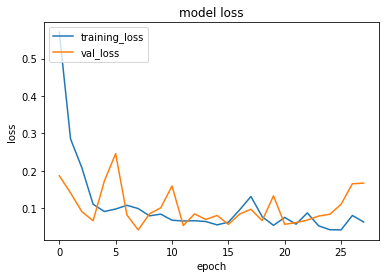

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'val_loss'], loc='upper left')
plt.show()